# Data exploration

## I.Import relevant librairires

In [1]:
import os
import sys
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
print(DEVICE)

cpu


Below, you can import the different modules coded in ``WeakSegNet/src``

In [4]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), "..")) # This is the repo directory: WeakSegNet/
SRC_PATH = os.path.join(BASE_DIR, "src")
sys.path.append(SRC_PATH)

from dataset import data_loading, inverse_normalize

/usr/local/Caskroom/miniconda/base/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## II.Load the data

In [5]:
# Sanity check: are the trainval.txt and test.txt files available

FILE_PATH = os.path.join(BASE_DIR, "data")

split = "trainval" # or "test"
print(f"Looking for {split}.txt in:", os.path.join(FILE_PATH, "annotations", f"{split}.txt"))
print("Does the file exists?", os.path.exists(os.path.join(FILE_PATH, "annotations", "test.txt")))

Looking for trainval.txt in: /Users/paulbouye/Desktop/UCL/Cours/Applied DL/WeakSegNet/data/annotations/trainval.txt
Does the file exists? True


## III.Data visualization

In [6]:
# Data splits: configure the size of the splits
batch_size_train, batch_size_val, batch_size_test = 32, 16, 32
val_split = 0.2
size = (batch_size_train, batch_size_val, batch_size_test, val_split)

In [7]:
# Configure the resizing of the images
image_size = 256

### 1.Fully supervised case

In [10]:
train_loader, val_loader, test_loader = data_loading(path=FILE_PATH, data_split_size=size, image_size=image_size, num_workers=0)


----Loading data...
Loading split from: /Users/paulbouye/Desktop/UCL/Cours/Applied DL/WeakSegNet/data/annotations/trainval.txt
Loading split from: /Users/paulbouye/Desktop/UCL/Cours/Applied DL/WeakSegNet/data/annotations/trainval.txt
Loading split from: /Users/paulbouye/Desktop/UCL/Cours/Applied DL/WeakSegNet/data/annotations/test.txt
[Data loaded succesfully]

Training set: 2944 samples
Validation set: 736 samples
Test set: 3669 samples


In [11]:
image_batch, mask_batch, info_batch = next(iter(train_loader))

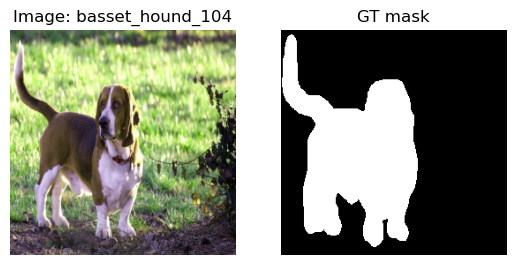

In [12]:
id = 8
image = inverse_normalize(image_batch[id]).permute(1, 2, 0).cpu().numpy()
mask = mask_batch[id].squeeze().cpu().numpy()
info = info_batch["name"][id]

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Image: " + info)
plt.axis('off')
plt.grid(False)

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="grey")
plt.title(f"GT mask")
plt.axis('off')

plt.grid(False)
plt.show()

In [13]:
unique_vals = torch.unique(mask_batch[0])
print("Unique mask values:", unique_vals)

Unique mask values: tensor([0., 1.])


### 2.Weakly supervised case: bounding boxes

In [14]:
box = info_batch["bbox"][0]
# TODO: find a way to scale the bouding box to the image size after resizing (i think the module v2 of pytorch does it)

In [15]:
box

tensor([ 51, 186, 239,  64, 168,  46,  72,  72, 189, 157,  17,  40, 384, 131,
         72, 130,  64, 265, 167, 123, 114, 179,  61, 119,  30, 212,  47,  24,
         25, 183, 114,  30])

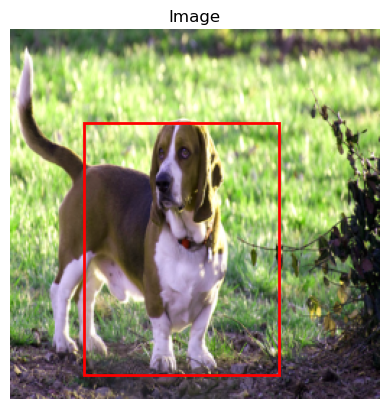

In [16]:
plt.imshow(image)
plt.title("Image")
plt.axis('off')
plt.grid(False)
ax = plt.gca()
width = box[1] - box[0]
heigth = box[3] - box[2]
ax.add_patch(patches.Rectangle((box[0], box[2]), width, heigth, linewidth=2, edgecolor='r', facecolor='none'))
plt.show()

### 3- Weakly supervised case: CMAP